# 相似性方法

## 欧几里德距离

## 余弦相似度

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
df = [
    [1, 0, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 1],
    [1, 1, 1, 0, 1],
]
r = cosine_similarity(df,df)
r

array([[1.        , 0.66666667, 0.81649658, 0.33333333, 0.57735027],
       [0.66666667, 1.        , 0.40824829, 0.66666667, 0.57735027],
       [0.81649658, 0.40824829, 1.        , 0.        , 0.70710678],
       [0.33333333, 0.66666667, 0.        , 1.        , 0.57735027],
       [0.57735027, 0.57735027, 0.70710678, 0.57735027, 1.        ]])

# softmax函数

In [1]:
import numpy as np


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # e_x = np.exp(x)
    e_x = np.exp(x)
    return e_x / e_x.sum()


if __name__ == '__main__':

    x = np.array([-3, 2, -1, 0])
    res = softmax(x)
    print(res)  # [0.0056533  0.83902451 0.04177257 0.11354962]

[0.0056533  0.83902451 0.04177257 0.11354962]


# 层次分析法

AHP（层次分析法）

　　层次分析法（The analytic hierarchy process）简称AHP，在20世纪70年代中期由美国运筹学家托马斯·塞蒂（TLsaaty）正式提出。它是一种定性和定量相结合的、系统化、层次化的分析方法。由于它在处理复杂的决策问题上的实用性和有效性，很快在世界范围得到重视。它的应用已遍及经济计划和管理、能源政策和分配、行为科学、军事指挥、运输、农业、教育、人才、医疗和环境等领域。

层次分析法的基本步骤  
1、建立层次结构模型。在深入分析实际问题的基础上，将有关的各个因素按照不同属性自上而下地分解成若干层次，同一层的诸因素从属于上一层的因素或对上层因素有影响，同时又支配下一层的因素或受到下层因素的作用。最上层为目标层，通常只有1个因素，最下层通常为方案或对象层，中间可以有一个或几个层          次，通常为准则或指标层。当准则过多时(譬如多于9个)应进一步分解出子准则层。

2、构造成对比较阵。从层次结构模型的第2层开始，对于从属于(或影响)上一层每个因素的同一层诸因素，用成对比较法和1—9比较尺度构造成对比较阵，直到最下层。

3、计算权向量并做一致性检验。对于每一个成对比较阵计算最大特征根及对应特征向量，利用一致性指标、随机一致性指标和一致性比率做一致性检验。若检验通过，特征向量(归一化后)即为权向量：若不通过，需重新构造成对比较阵。

4、计算组合权向量并做组合一致性检验。计算最下层对目标的组合权向量，并根据公式做组合一致性检验，若检验通过，则可按照组合权向量表示的结果进行决策，否则需要重新考虑模型或重新构造那些一致性比率较大的成对比较阵。

运用AHP法进行决策时，需要经历以下4个步骤：

　　1、建立系统的递阶层次结构；

　　2、构造两两比较判断矩阵；（正互反矩阵）

　　3、针对某一个标准，计算各备选元素的权重；

　　4、计算当前一层元素关于总目标的排序权重。

　　5、进行一致性检验。

模型  
    对三个干部候选人y 1、y 2、y 3，按选拔干部的五个标准：品德、才能、资历、年龄和群众关系，构成如下层次分析模型：假设有三个干部候选人y 1、y 2、y 3，按选拔干部的五个标准：品德，才能，资历，年龄和群众关系，构成如下层次分析模型
    
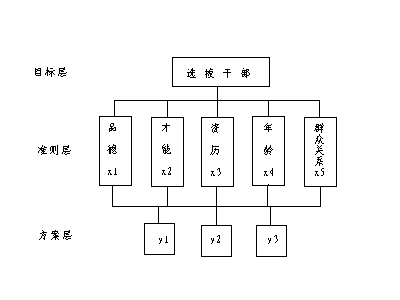

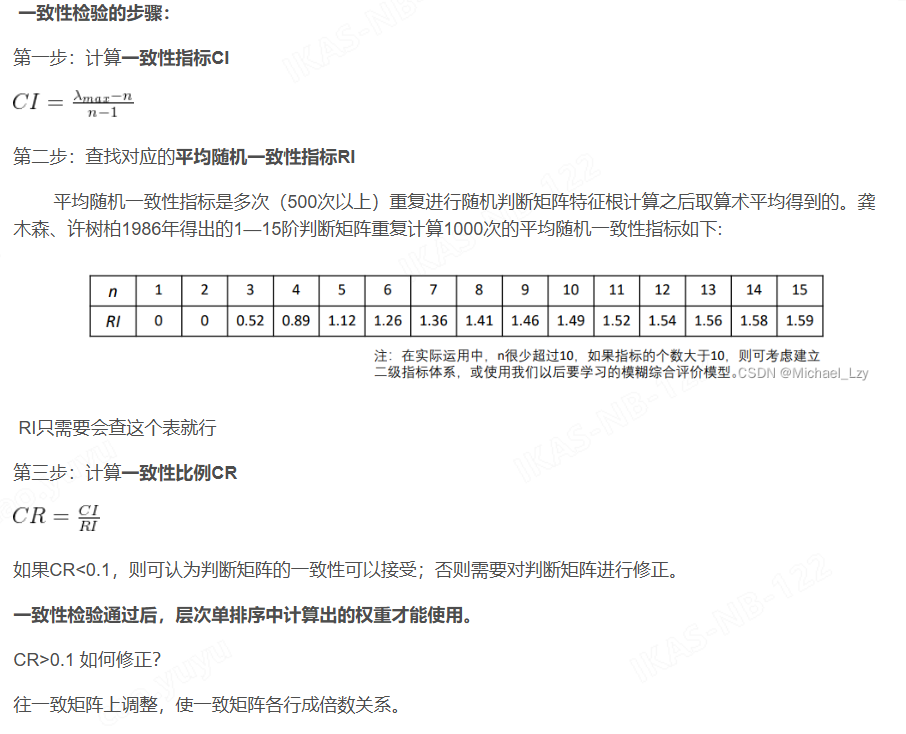

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

RI_dict = {
    1: 0,
    2: 0,
    3: 0.58,
    4: 0.90,
    5: 1.12,
    6: 1.24,
    7: 1.32,
    8: 1.41,
    9: 1.45
}


def get_w(array):
    row = array.shape[0]  # 计算出阶数
    a_axis_0_sum = array.sum(axis=0)
    # print(a_axis_0_sum)
    b = array / a_axis_0_sum  # 新的矩阵b
    # print(b)
    b_axis_0_sum = b.sum(axis=0)
    b_axis_1_sum = b.sum(axis=1)  # 每一行的特征向量
    # print(b_axis_1_sum)
    w = b_axis_1_sum / row  # 归一化处理(特征向量)
    nw = w * row
    AW = (w * array).sum(axis=1)
    # print(AW)
    max_max = sum(AW / (row * w))
    # print(max_max)
    CI = (max_max - row) / (row - 1)
    CR = CI / RI_dict[row]
    if CR < 0.1:
        # print(round(CR, 3))
        # print('满足一致性')
        # print(np.max(w))
        # print(sorted(w,reverse=True))
        # print(max_max)
        # print('特征向量:%s' % w)
        return w
    else:
        print(round(CR, 3))
        print('不满足一致性，请进行修改')


def main(array):
    if type(array) is np.ndarray:
        return get_w(array)
    else:
        print('请输入numpy对象')


if __name__ == '__main__':
    e = np.array([[1, 2, 7, 5, 5], [1 / 2, 1, 4, 3, 3],
                  [1 / 7, 1 / 4, 1, 1 / 2, 1 / 3], [1 / 5, 1 / 3, 2, 1, 1],
                  [1 / 5, 1 / 3, 3, 1, 1]])
    a = np.array([[1, 1 / 3, 1 / 8], [3, 1, 1 / 3], [8, 3, 1]])
    b = np.array([[1, 2, 5], [1 / 2, 1, 2], [1 / 5, 1 / 2, 1]])
    c = np.array([[1, 1, 3], [1, 1, 3], [1 / 3, 1 / 3, 1]])
    d = np.array([[1, 3, 4], [1 / 3, 1, 1], [1 / 4, 1, 1]])
    f = np.array([[1, 4, 1 / 2], [1 / 4, 1, 1 / 4], [2, 4, 1]])
    e = main(e)
    a = main(a)
    b = main(b)
    c = main(c)
    d = main(d)
    f = main(f)
    try:
        res = np.array([a, b, c, d, f])
        ret = (np.transpose(res) * e).sum(axis=1)
        print(ret)
    except TypeError:
        print('数据有误，可能不满足一致性，请进行修改')

[0.31878206 0.23919592 0.44202202]


# 假设检验

## t检验

In [1]:
from scipy.stats import ttest_1samp
import numpy as np

print("Null Hypothesis:μ=30，α=0.05")
ages = [25, 36, 15, 40, 28, 31, 32, 30, 29, 28, 27, 33, 35]
t = (np.mean(ages) - 30) / (np.std(ages, ddof=1) / np.sqrt(len(ages)))

ttest, pval = ttest_1samp(ages, 30)
print(t, ttest)
if pval < 0.05:
    print("Reject the Null Hypothesis.")
else:
    print("Accept the Null Hypothesis.")

Null Hypothesis:μ=30，α=0.05
-0.045651472749777454 -0.04565147274977746
Accept the Null Hypothesis.
